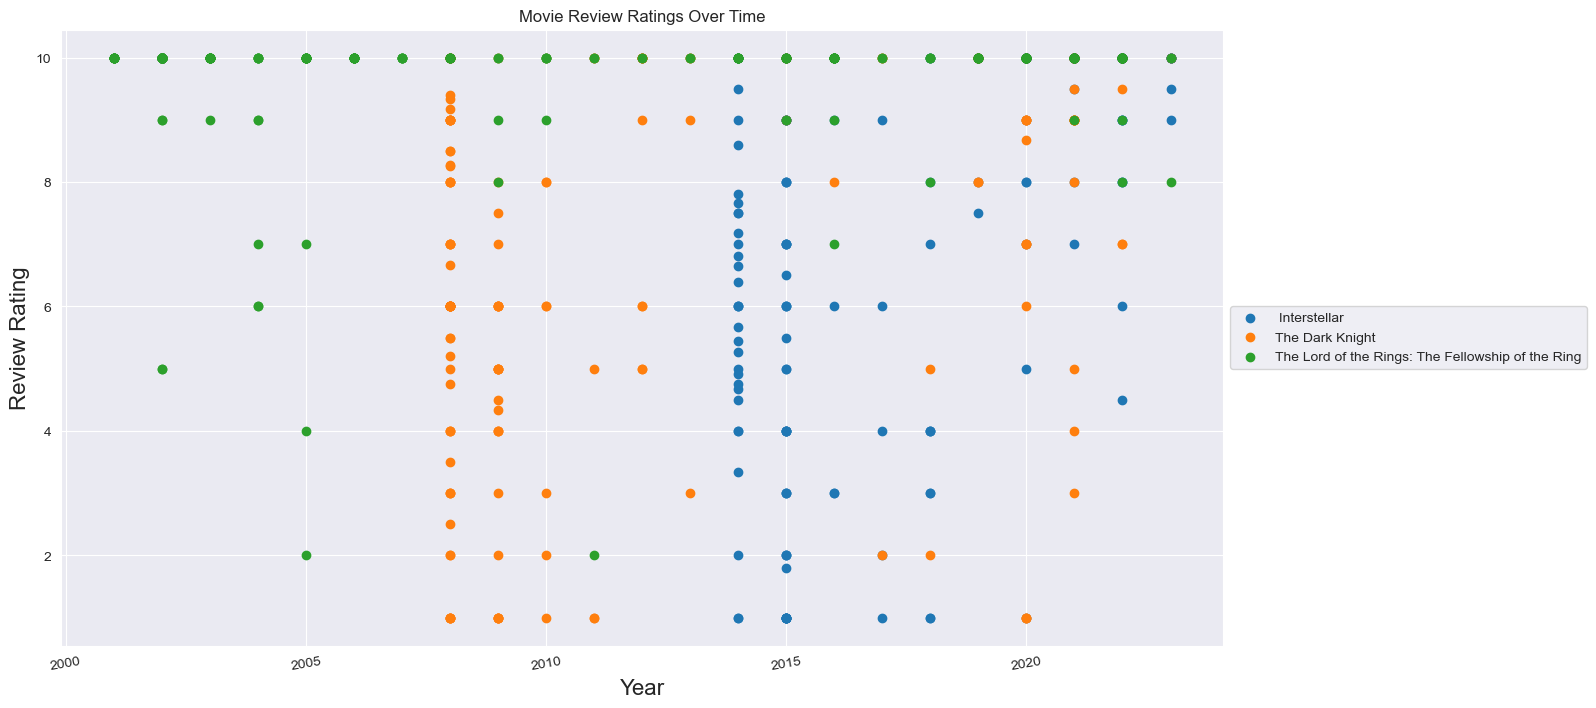

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from an xlsx file
df = pd.read_excel('/users/IR/IMDBMovies.xlsx')

# Extract the numeric value from the rating column and convert it to a float
df['Review_Rating'] = df['Review_Rating'].astype(float)

 
# Convert the dates to a datetime format and sort by review date
df['Review_Date'] = pd.to_datetime(df['Review_Date'], format='%d/%m/%Y')
df = df.sort_values(by=['Review_Date'])


# Group the data by movie and comments date
grouped = df.groupby(['Movie_Title', 'Review_Date']).agg({'Review_Rating': 'mean'})

# Reshape the data to have movie names as columns
pivoted = pd.pivot_table(grouped, values='Review_Rating', index='Review_Date', columns='Movie_Title')

# Set the plot style
sns.set_style("darkgrid")

# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Review Rating", fontsize=16)
ax.set_title("Movie Review Ratings Over Time", fontsize=20)

for col in pivoted.columns:
    ax.scatter(pivoted.index.year, pivoted[col], label=col)
ax.set(title="Movie Review Ratings Over Time", xlabel="Year", ylabel="Review Rating")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=10)  # Rotate x-axis labels by 10 degrees
plt.show()
